## Classifying Images as sad or happy

In [21]:
#Installing the necessary Libraries

!pip install tensorflow matplotlib opencv-python

In [22]:
#Listing all the libraries in pip

!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.1.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.10
aiosignal                          1.3.1
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2024.12.9.0.36.21
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread          

In [23]:
#Importing the required libraries

import tensorflow as tf #for machine learning
import os #for loading the dataset

In [24]:
#Listing the gpus in my colab

gpu = tf.config.experimental.list_physical_devices('GPU')
gpu

[]

In [25]:
#limiting the size of the memory to be used by the gpu

for i in gpu:
  tf.config.experimental.set_memory_growth(i,True)

In [26]:
#importing other libraries

import cv2 #Open cv for computer vision
import imghdr #Image hdr for determining the extension in an image eg png, jpg etc

### Removing Corrupt images

In [27]:
#Variable Naming the folder that contains the happy/sad images

data_dir = '/content/drive/MyDrive/Happy Sad Classifier/data'

In [28]:
#Giving the extensions that we want our images to have

image_exts = ['jpeg','jpg','png','bmp']

In [29]:
#Listing the data we have in the dataset folder directory

os.listdir(data_dir)

['sad', 'happy', '.ipynb_checkpoints']

In [30]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 'images13.jpg',
 'image29.jpeg',
 'image21.jpeg',
 'image12.jpeg',
 'getty_494581822_130796.jpg',
 'image18.jpeg',
 '170404-happy-workers-feature.jpg',
 'image11.jpeg',
 'group-of-happy-people-2.jpg',
 'image22.jpeg',
 'GettyImages-565706549-949x534.jpg',
 'image28.jpeg',
 '1902539.jpg',
 'A_Sep20_14_1189155141.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 'habits-of-happy-people-cr3.jpg',
 'How_Happy_Are_People_at_Work.jpg',
 'happy-people-group-fb.jpg',
 'image19.jpeg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'images12.jpg',
 'hqdefault.jpg',
 'getty_505175324_2000131020009280246_158016.jpg',
 'images11.jpg',
 'happy-people-1024x768.jpeg',
 'image31.jpeg',
 'image13.jpeg',
 'images.jpg',
 'HAPPY-PEOPLE-CLUB-LOGO.jpg',
 'image8.jpeg',
 'happy-people.jpg',
 'Top-Secrets-of-How-to-be-Happy.jpg',
 'image23.jpeg',
 'happy-people-vector-29209040.jpg',
 'blog_image_201802

In [31]:
#Finding the number of images we have in the happy class

happy = os.listdir(os.path.join(data_dir,'happy'))
len(happy)

153

In [32]:
#Finding the number of images we have in the sad class

sad = os.listdir(os.path.join(data_dir,'sad'))
len(sad)

152

In [33]:
#Removing

for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)

    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)

      if img not in image_exts:
        print('Image is not in the estension list', image_path)
        os.remove(image_path)

    except Exception as e:
      print('Issue with image', image_path)

Issue with image /content/drive/MyDrive/Happy Sad Classifier/data/sad/image28.jpeg
Issue with image /content/drive/MyDrive/Happy Sad Classifier/data/sad/images45.jpg
Issue with image /content/drive/MyDrive/Happy Sad Classifier/data/sad/images34.jpg
Issue with image /content/drive/MyDrive/Happy Sad Classifier/data/sad/sad-depressed-man.jpg
Issue with image /content/drive/MyDrive/Happy Sad Classifier/data/sad/images28.jpg
Issue with image /content/drive/MyDrive/Happy Sad Classifier/data/sad/Sad-People-Bad-People-Luckie-1050x700.jpg
Issue with image /content/drive/MyDrive/Happy Sad Classifier/data/sad/images18.jpg
Issue with image /content/drive/MyDrive/Happy Sad Classifier/data/sad/images51.jpg
Issue with image /content/drive/MyDrive/Happy Sad Classifier/data/sad/image13.jpeg
Issue with image /content/drive/MyDrive/Happy Sad Classifier/data/sad/images52.jpg
Issue with image /content/drive/MyDrive/Happy Sad Classifier/data/sad/image25.jpeg
Issue with image /content/drive/MyDrive/Happy Sad

### Loading the Images

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
#Building the data pipleine

data = tf.keras.utils.image_dataset_from_directory(data_dir) #Sets the dataset to default sizes and batches. CHeck tf.data.Dataset?? for more info


Found 305 files belonging to 2 classes.


In [36]:
#convert data-variable to a numpy array to allow us access the data pipeline

data_iterator = data.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7e38c45eaf20>)

In [37]:
#Getting the data - one batch

batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

In [38]:
batch[1]

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int32)

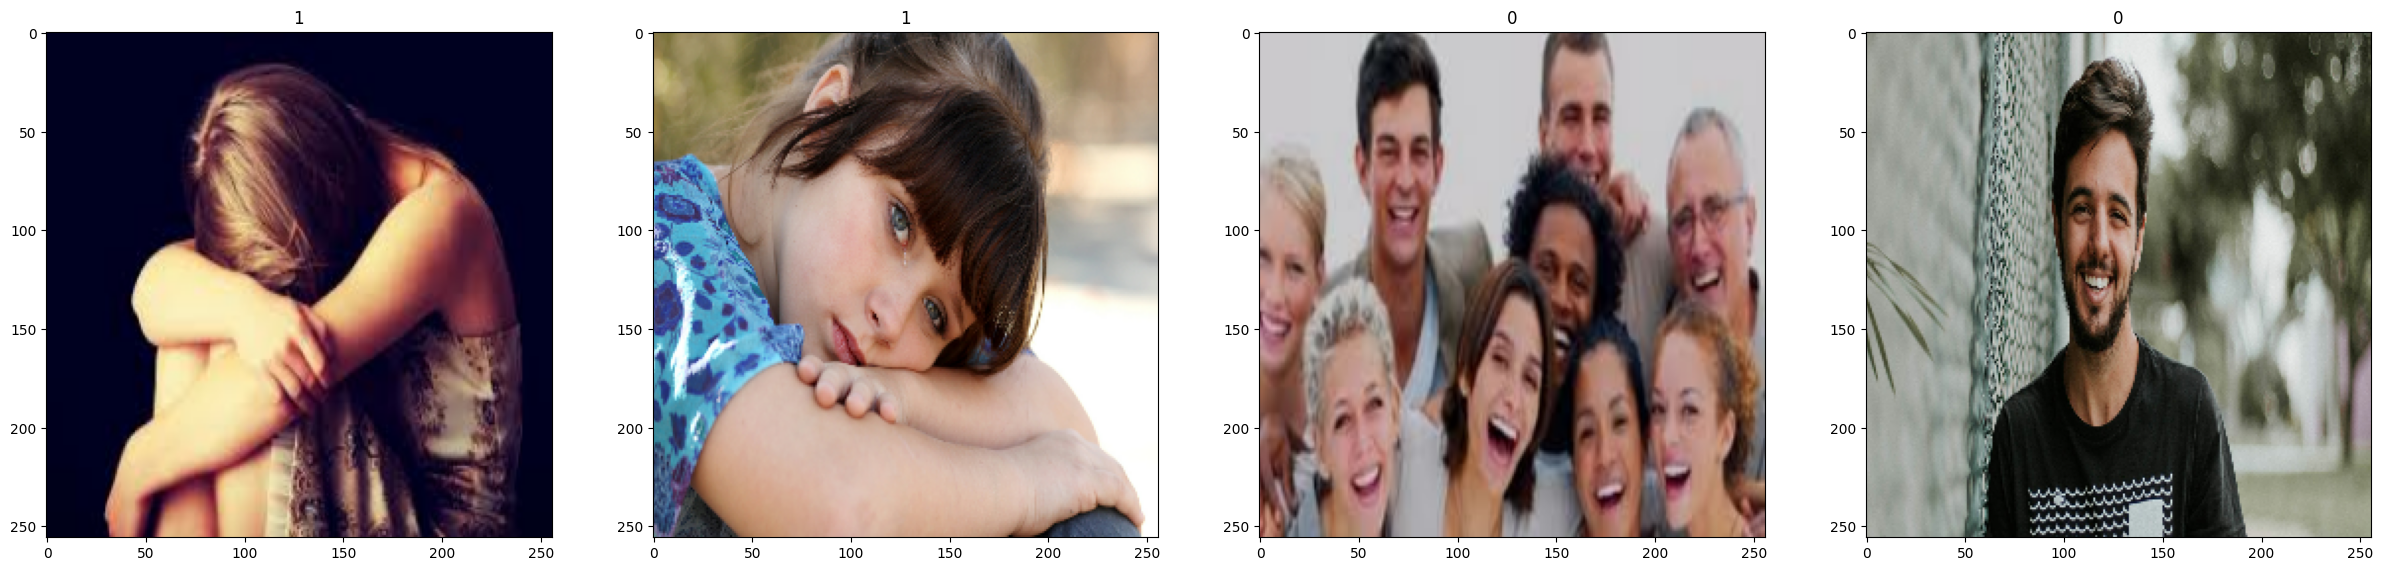

In [39]:
#To get images in class 0 or class 1:

fig, ax = plt.subplots(ncols = 4, figsize = (30,30))

for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

  #Class 1 = sad, class 0 = happy

In [40]:
class_names = data.class_names
class_names

['happy', 'sad']

### Preprocessing

In [41]:
#Scaling

data = data.map(lambda X, y: (X/255, y))


In [42]:
#Confirming the minimum and maximum scaled values

data.as_numpy_iterator().next()[0].max()


1.0

In [43]:
#Splitting the data

len(data)# getting the total number of batches

10

In [44]:
#Splitting the images into train, validation, and test sizes

train_size = int(len(data) * .7) #Int helps the output not to be in decimal
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)

print('Train size:',train_size)
print('Validation size:',val_size)
print('Test size:',test_size)

Train size: 7
Validation size: 2
Test size: 1


In [45]:

#Geting the train, val, and test dataset

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

print(len(train))
print(len(val))
print(len(test))

7
2
1


In [46]:
#Rescaling and resizing

from tensorflow.keras import layers, models

In [47]:
rescaled_and_resized = tf.keras.Sequential({
    layers.Resizing(256,256),
    layers.Rescaling(1.0/255)
})

rescaled_and_resized

<Sequential name=sequential, built=False>

In [48]:
#Data Augmentation

data_augmentation = tf.keras.Sequential({
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomRotation(0.2)
})

data_augmentation

<Sequential name=sequential_1, built=False>

### Building the model

In [49]:
#Importing the necessary dependancies

from tensorflow.keras.models import Sequential #This is the model itself, same way as importing KNN, or SVM or Logistic Regression from SKLEARN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [50]:
#Initializing the model

model = Sequential()

In [51]:
#Creating the model

model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
#Compiling the model and optimizing using adam

model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])


In [53]:
#Summarizing the model

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
#Training the model

logdir = '/content/drive/MyDrive/Happy Sad Classifier/Logs'

In [55]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [56]:
#Fitting the model

history = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.4874 - loss: 1.0146 - val_accuracy: 0.5625 - val_loss: 0.7036
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.6238 - loss: 0.6680 - val_accuracy: 0.5156 - val_loss: 0.6361
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5429 - loss: 0.6246 - val_accuracy: 0.7812 - val_loss: 0.5601
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.7747 - loss: 0.5502 - val_accuracy: 0.8281 - val_loss: 0.5773
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8310 - loss: 0.4948 - val_accuracy: 0.7188 - val_loss: 0.4588
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.7988 - loss: 0.4301 - val_accuracy: 0.7500 - val_loss: 0.5276
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.8287 - loss: 0.3944 - val_accuracy: 0.8438 - val_loss: 0.3616
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8757 - loss: 0.3113 - val_accuracy: 0.9062 - val_loss: 0.2594
Epoch 9/

In [57]:
history.history

{'accuracy': [0.5223214030265808,
  0.6383928656578064,
  0.6071428656578064,
  0.7544642686843872,
  0.8303571343421936,
  0.8080357313156128,
  0.8482142686843872,
  0.875,
  0.8928571343421936,
  0.9553571343421936,
  0.9330357313156128,
  0.9732142686843872,
  0.9732142686843872,
  0.9732142686843872,
  0.9776785969734192,
  0.9955357313156128,
  0.9955357313156128,
  0.9910714030265808,
  1.0,
  0.9821428656578064],
 'loss': [0.9586111307144165,
  0.6587291359901428,
  0.6113865971565247,
  0.5451436638832092,
  0.5009810328483582,
  0.4190123379230499,
  0.3682038187980652,
  0.3180387318134308,
  0.27161189913749695,
  0.17144903540611267,
  0.18999241292476654,
  0.12395953387022018,
  0.09531430155038834,
  0.08866597712039948,
  0.06296228617429733,
  0.04106346517801285,
  0.03527574986219406,
  0.028241340070962906,
  0.011386132799088955,
  0.037463922053575516],
 'val_accuracy': [0.5625,
  0.515625,
  0.78125,
  0.828125,
  0.71875,
  0.75,
  0.84375,
  0.90625,
  0.95312

### Plotting the performance of the model

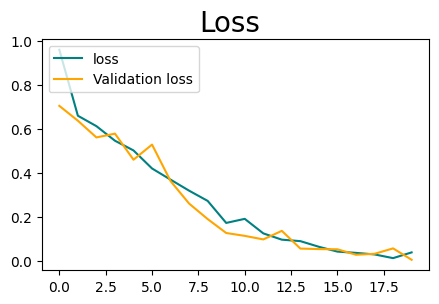

In [58]:
#Plotting the loss

plt.figure(figsize = (5,3))
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'Validation loss')
plt.suptitle('Loss', size = 20)
plt.legend(loc = 'upper left')
plt.show()

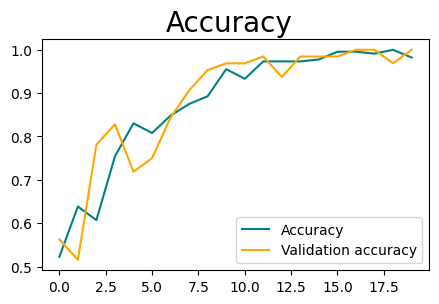

In [59]:
#Plotting the accuracy

plt.figure(figsize = (5,3))
plt.plot(history.history['accuracy'], color = 'teal', label = 'Accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'Validation accuracy')
plt.suptitle('Accuracy', size = 20)
plt.legend(loc = 'lower right')
plt.show()

### Model Evaluation

In [60]:
#Importing the necessary libraries

from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy

In [61]:
#Initializing the metrics

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [62]:
#Making predictions on the X while iterating on each batch

for batch in test.as_numpy_iterator():
  X,y = batch
  y_prediction = model.predict(X)
  pre.update_state(y, y_prediction)
  re.update_state(y, y_prediction)
  acc.update_state(y, y_prediction)

print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1.0 1.0 1.0


All the metrics have a score of 1 on the model, indicating optimal performance.

### Testing the model on new data

In [63]:
import cv2

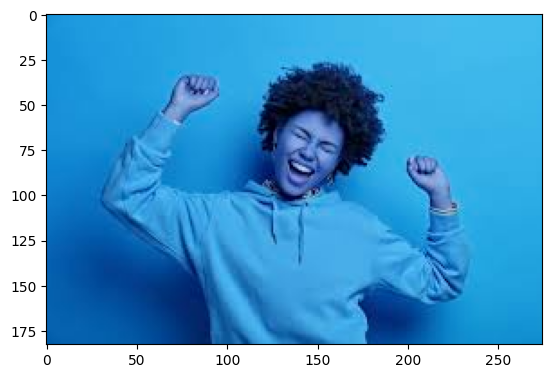

In [65]:
happy = cv2.imread('/content/drive/MyDrive/Happy Sad Classifier/test/happytest.jpg')
plt.imshow(happy)
plt.show()

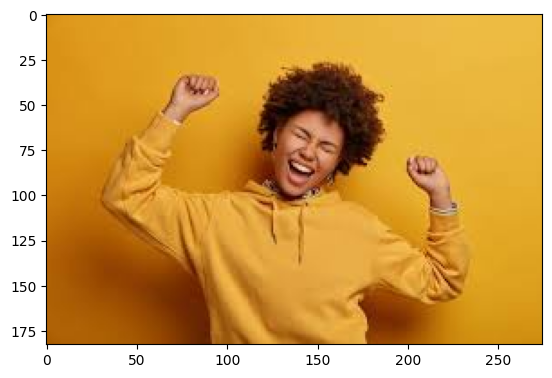

In [66]:
#Since the image is being read as a bgr, we can convert it to rgb by:

happy_rgb = cv2.imread('/content/drive/MyDrive/Happy Sad Classifier/data/happytest.jpg')
plt.imshow(cv2.cvtColor(happy, cv2.COLOR_BGR2RGB))
plt.show()

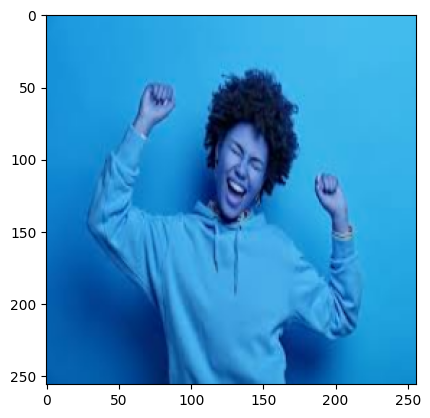

In [68]:
#Resizing the image to 256 by 256 so that it can pass through the model

resize = tf.image.resize(happy, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [69]:
#Predicting the new happy data
import numpy as np

y_prediction = model.predict(np.expand_dims(resize/255,0))
y_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


array([[0.02086306]], dtype=float32)

- 0.5 and below - happy
- 0.5 and above - sad

- The above person has been classified as 0.02, meaning she is happy

In [70]:
if y_prediction > 0.5:
  print('The person is sad')
elif y_prediction < 0.5:
    print('The person happy')

The person happy


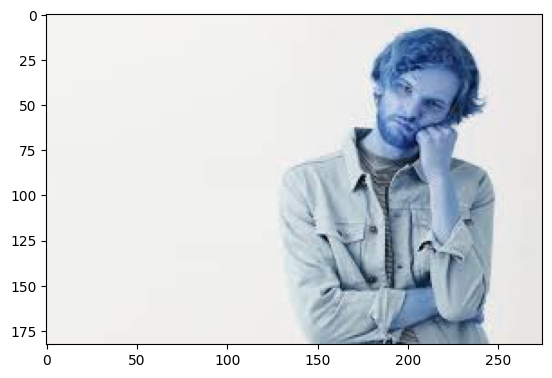

In [71]:
#Testing with the sad dataset

sad = cv2.imread('/content/drive/MyDrive/Happy Sad Classifier/test/sadtest.jpg')
plt.imshow(sad)
plt.show()

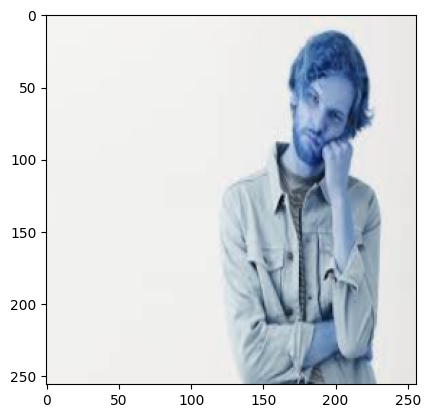

In [72]:
#Resizing the image to 256,256

resize = tf.image.resize(sad, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
#Making predictions

y_predict = model.predict(np.expand_dims(resize/255,0))
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[0.18942219]], dtype=float32)

### Saving the model

In [74]:
#Importing the necessary libaries

from tensorflow.keras.models import load_model

In [75]:
#Saving the model

model.save(os.path.join('/content/drive/MyDrive/Happy Sad Classifier/Models','imageclassification.h5'))

In [76]:
#Reloading and renaming the model

new_model = load_model(os.path.join('/content/drive/MyDrive/Happy Sad Classifier/Models','imageclassification.h5'))
new_model

<Sequential name=sequential_2, built=True>

In [78]:
#Passing in new data to our renamed model

new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[0.18942219]], dtype=float32)